### here i am gooing to use the set of tool like search , news search and much more 
### my example for this chainwas take the two llm and for each llm i am gooing to attach the 3 to 4 tool in that llm 

In [ ]:
#befine the llm 
from langchain_core.messages import AIMessage, HumanMessage

from langchain_groq import ChatGroq

llm = ChatGroq(
    model="gemma2-9b-it",
    temperature=0,
    max_tokens=None,
    timeout=60,
    groq_api_key="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",
    # other params...
)

llm.invoke([HumanMessage(content="hello how are you!")])


AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to help! How can I assist you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 14, 'total_tokens': 46, 'completion_time': 0.058181818, 'prompt_time': 0.001911996, 'queue_time': 0.29047002699999996, 'total_time': 0.060093814}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-85eb8065-1ff7-4676-b0f7-ecd8511654c0-0', usage_metadata={'input_tokens': 14, 'output_tokens': 32, 'total_tokens': 46})

In [29]:
# before that we want to crete the new some of the tools
import socket
import requests
def featch_ip() -> str:
    """Fetch the IP address of the meachine .
    return:
        return the ip of the meachine
    """
    try:
        ip_address = requests.get("https://api.ipify.org").text
        return ip_address
    except requests.RequestException:
        return "Unable to fetch IP address"

In [30]:
llm_with_tools = llm.bind_tools([featch_ip])

In [31]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"can i get the ip of my meachine", name="Lance")])

In [34]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5xex', 'function': {'arguments': '{}', 'name': 'featch_ip'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 933, 'total_tokens': 1003, 'completion_time': 0.127272727, 'prompt_time': 0.040584622, 'queue_time': 0.23821377699999996, 'total_time': 0.167857349}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c9473863-fe48-4d1d-8ed3-9294529b4bf3-0', tool_calls=[{'name': 'featch_ip', 'args': {}, 'id': 'call_5xex', 'type': 'tool_call'}], usage_metadata={'input_tokens': 933, 'output_tokens': 70, 'total_tokens': 1003})

In [12]:
tool_call.tool_calls

[{'name': 'featch_ip', 'args': {}, 'id': 'call_qmhg', 'type': 'tool_call'}]

In [15]:
# define the state 

from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage


class Store_message(TypedDict):
    """State to store messages."""

    messages: Annotated[list[AnyMessage], add_messages]
    name: str | None

In [20]:
# define the node and ediges


from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
def greeting_node(state: Store_message):
    print("______greeting_node______")
    print("hello")
    return {"messages": state["messages"]}

def llm_with_tool_calling_node(state: Store_message):
    print("______llm_with_tool_calling_node______")
    print("calling the tool")
    # call the llm with the tool
    tool_call = llm_with_tools.invoke(state["messages"])
    # add the tool call to the state
    return {"messages": tool_call}


#add nodes

graph = StateGraph(Store_message)
graph.add_node("greeting",greeting_node)
graph.add_node("tool_calling",llm_with_tool_calling_node)

#add simple ediges

graph.add_edge(START, "greeting")
graph.add_edge("greeting","tool_calling")
graph.add_edge("tool_calling",END)
build = graph.compile()


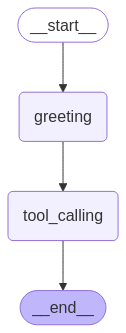

In [18]:
# from langsmith import Client
# client = Client(api_key="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")
# prompt = client.pull_prompt("rlm/rag-document-relevance", include_model=True)

build




In [22]:
messages = build.invoke({"messages": HumanMessage(content="give the ip of my meachine")})
for m in messages['messages']:
    m.pretty_print()

______greeting_node______
hello
______llm_with_tool_calling_node______
calling the tool
================================ Human Message =================================

give the ip of my meachine
================================== Ai Message ==================================
Tool Calls:
  featch_ip (call_dqw3)
 Call ID: call_dqw3
  Args:


In [11]:
prompt

StructuredPrompt(input_variables=['input'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-document-relevance', 'lc_hub_commit_hash': '123af323ca4720fc195f1d6966ba25fa67348c351972be2088faf2b22f2de056'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a grader assessing relevance of a retrieved document to a user question.\n\nIf the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \\n\n\nIt does not need to be a stringent test. The goal is to filter out erroneous retrievals. \\n\n\nGive a binary score 1 or 0 score, where 1 means that the document is relevant to the question.', template_format='mustache'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='Retrieved documents: {{input.documents}} \n\nUser questio

## create the chain using the tools with two models one for normal user and another one for basil user

In [ ]:
# define the state 




In [1]:
# define the llm and llm2

from langchain_core.messages import AIMessage, HumanMessage

from langchain_groq import ChatGroq
# this llm1 is only for basil
llm1 = ChatGroq(
    model="qwen-qwq-32b",
    temperature=0,
    max_tokens=None,
    timeout=None,
    groq_api_key="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",
    # other params...
)

#this llm for everyone
llm2 = ChatGroq(
    model="qwen-qwq-32b",
    temperature=0,
    max_tokens=None,
    timeout=60,
    groq_api_key="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",
    # other params...
)

In [66]:
llm1.invoke("hello")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 6, 'total_tokens': 22, 'completion_time': 0.058181818, 'prompt_time': 0.003643054, 'queue_time': 0.103823166, 'total_time': 0.061824872}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'stop', 'logprobs': None}, id='run-46757866-d89f-4aa5-961c-a25a30526709-0', usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22})

In [41]:
llm2.invoke("hello")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 6, 'total_tokens': 22, 'completion_time': 0.058181818, 'prompt_time': 0.003478417, 'queue_time': 0.051595749, 'total_time': 0.061660235}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'stop', 'logprobs': None}, id='run-92e31326-9eec-478d-8487-90e9945a92a7-0', usage_metadata={'input_tokens': 6, 'output_tokens': 16, 'total_tokens': 22})

In [2]:
# create the bunch of tool for llm


import socket
# featch the ip address
from typing import List
import requests

#only for basil 
def featch_ip(ip:str) -> str:
    """it only featch the ip address from the meachine to get the public ip"""
    try:
        ip_address = requests.get("https://api.ipify.org").text
        return ip_address
    except requests.RequestException:
        return "Unable to fetch IP address"


#only for basil to get the what are the port are the localmeachine 

# def scanning_port(port_start:int,port_end:int)-> str:
#     """get the port details from the local meachine
#     args:
#     prot_start: staring number of port eg:4
#     prot_end: ending number of port eg:90
#     """
#     t_IP = gethostbyname("127.0.0.1")
#     values = []
#     for i in range(50, 500):
#       s = socket(port_start, port_end)
      
#       conn = s.connect_ex((t_IP, i))
#       if(conn == 0) :
#          print ('Port %d: OPEN' % (i,))
#          values+=[f"Port: OPEN' % {(i,)}"]
#       s.close()
#     return values

def scanning_port(port_start: int, port_end: int) -> List[str]:
    """
    Scans a range of ports on localhost to check if they are open.

    Args:
        port_start (int): Starting port number.
        port_end (int): Ending port number.

    Returns:
        List[str]: List of open ports with messages.
    """
    t_IP = socket.gethostbyname("127.0.0.1")
    open_ports = []

    for port in range(port_start, port_end + 1):  # range should include end
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        # s.settimeout(0.5)  # Add timeout to avoid hanging
        conn = s.connect_ex((t_IP, port))
        if conn == 0:
            msg = f"Port {port}: OPEN"
            print(msg)
            open_ports.append(msg)
        s.close()

    return open_ports


#for other user function
#that only for addiciton and subraction

def addiction(a:int, b:int)-> int:
    """this function was perform the addicion and give the output in int
    args:
    a: number eg:44
    b: number eg:3
    """
    return a + b

def subraction(a:int, b:int)-> int:
    """this function was perform the subraction and give the output in int
    args:
    a: number eg:44
    b: number eg:3
    """
    return a - b


In [3]:
#binindg the along with two llms

llm1 = llm1.bind_tools([featch_ip,scanning_port])
llm2 = llm2.bind_tools([addiction,subraction])

In [15]:
answer = llm1.invoke([HumanMessage(content="what are the port are open in my meachine from 80 to 81 port!")])
answer

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tb7e', 'function': {'arguments': '{"port_start":80,"port_end":81}', 'name': 'scanning_port'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 1133, 'total_tokens': 1227, 'completion_time': 0.170909091, 'prompt_time': 0.064568088, 'queue_time': 0.23521980099999998, 'total_time': 0.235477179}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-493f5445-ce59-4608-ad6b-b5e2984e8035-0', tool_calls=[{'name': 'scanning_port', 'args': {'port_start': 80, 'port_end': 81}, 'id': 'call_tb7e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1133, 'output_tokens': 94, 'total_tokens': 1227})

In [70]:
answer = llm1.invoke([HumanMessage(content="give my meachine ip address of 192.193.33.44")])
answer

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_r4c6', 'function': {'arguments': '{"ip":"192.193.33.44"}', 'name': 'featch_ip'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 223, 'total_tokens': 336, 'completion_time': 0.410909091, 'prompt_time': 0.053710801, 'queue_time': 1.352470433, 'total_time': 0.464619892}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2f8d8645-8aa2-4e85-991b-cb71bd22be51-0', tool_calls=[{'name': 'featch_ip', 'args': {'ip': '192.193.33.44'}, 'id': 'call_r4c6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 223, 'output_tokens': 113, 'total_tokens': 336})

In [63]:
answer = llm2.invoke([HumanMessage(content="hello")])
answer

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8n44', 'function': {'arguments': '{"a": 44, "b": 3}', 'name': 'addiction'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 277, 'prompt_tokens': 219, 'total_tokens': 496, 'completion_time': 1.007272727, 'prompt_time': 0.083227291, 'queue_time': 0.214741972, 'total_time': 1.090500018}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6ae08c0c-5532-4f68-a701-6a04b78c3527-0', tool_calls=[{'name': 'addiction', 'args': {'a': 44, 'b': 3}, 'id': 'call_8n44', 'type': 'tool_call'}], usage_metadata={'input_tokens': 219, 'output_tokens': 277, 'total_tokens': 496})

In [64]:
answer = llm2.invoke([HumanMessage(content="hello")])
answer

AIMessage(content="Hello! It seems like you might want to perform an addition or subtraction. Could you please provide the numbers you'd like to work with?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 219, 'total_tokens': 317, 'completion_time': 0.356363636, 'prompt_time': 0.049925099, 'queue_time': 0.12893226, 'total_time': 0.406288735}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_454c494f52', 'finish_reason': 'stop', 'logprobs': None}, id='run-62417364-440f-4ca1-b9a7-cced8568a403-0', usage_metadata={'input_tokens': 219, 'output_tokens': 98, 'total_tokens': 317})

In [6]:
def tools_condition_for_llm1(state: Multi_llm_state) -> Literal["tools1","__end__"]:
    # some logic to decide if tools1 should run
    # e.g. if a tool call is needed
    if "tool_call" in str(state["messages"][-1]):
        return "tools1"
    return "__end__"

def tools_condition_for_llm2(state: Multi_llm_state) -> Literal["tools2","__end__"]:
    if "tool_call" in str(state["messages"][-1]):
        return "tools2"
    return "__end__"

In [5]:
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Literal  
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs. and also perfoem the tool exicuction ")


class Multi_llm_state(TypedDict):
    """State to store messages."""

    messages: Annotated[list[AnyMessage], add_messages]
    name: str | None


In [7]:
# define the node and condictionss


from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# condiiction ediges

def routing_based_on_names(state:Multi_llm_state)-> Literal["llm1","llm2"]:
    if state["name"] == "basil":
        return "llm1"
    return "llm2"


#greeding card:

def greeting(state:Multi_llm_state):
    print("_____greeting_______")
    print(f"Hello {state["name"]}")
    return {"messages":state["messages"], "name":state["name"]}
graph = StateGraph(Multi_llm_state)
#define the nodes


# node for llm1 and llm2

def llm_1(state:Multi_llm_state):
    print("------llm1 for basil------")
    return {"messages": llm1.invoke(state["messages"])}

def llm_2(state:Multi_llm_state):
    print("------llm2 for other member------")
    return {"messages": llm2.invoke(state["messages"])}


#define the nodes
graph.add_node("greeting",greeting)
graph.add_node("llm1",llm_1)
graph.add_node("llm2",llm_2)
graph.add_node("tools1",ToolNode([featch_ip,scanning_port]))
graph.add_node("tools2",ToolNode([addiction,subraction]))


#add the ediges and condiction ediges

graph.add_edge(START,"greeting")
graph.add_conditional_edges("greeting",routing_based_on_names)
graph.add_conditional_edges("llm1",tools_condition_for_llm1)
graph.add_conditional_edges("llm2",tools_condition_for_llm2)
graph.add_edge("tools1", "llm1")
graph.add_edge("tools2", "llm2")

build = graph.compile()


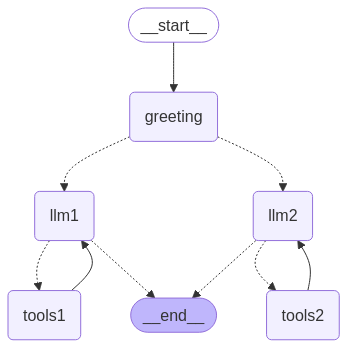

In [9]:
build

In [10]:
messages = build.invoke({"messages": [sys_msg, HumanMessage(content="give me an port scane for my meachine and port of 80 to port of 81")],"name":"basil"})
for m in messages['messages']:
    
    m.pretty_print()

_____greeting_______
Hello basil
------llm1 for basil------
Port 80: OPEN
------llm1 for basil------
================================ System Message ================================

You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs. and also perfoem the tool exicuction 
================================ Human Message =================================

give me an port scane for my meachine and port of 80 to port of 81
================================== Ai Message ==================================
Tool Calls:
  scanning_port (call_v836)
 Call ID: call_v836
  Args:
    port_start: 80
    port_end: 81
================================= Tool Message =================================
Name: scanning_port

["Port 80: OPEN"]
================================== Ai Message ==================================

The port scan results for your machine show:  
- **Port 80: OPEN**  

Port 81 does not appear to be open based on the scan. Let me know if you'd

In [8]:
messages = build.invoke({"messages": HumanMessage(content="whata the port are open from 80 to 85 in my meachine"),"name":"suresh"})
for m in messages['messages']:
    m.pretty_print()

_____greeting_______
Hello suresh
------llm2 for other member------
================================ Human Message =================================

whata the port are open from 80 to 85 in my meachine
================================== Ai Message ==================================

I don't have access to your machine's system information or network status. To check open ports on your machine, you can use command-line tools like `netstat` or `nmap`. For example:

```bash
netstat -tuln | grep ':80\\|:81\\|:82\\|:83\\|:84\\|:85'
```

This will show which ports in the 80-85 range are currently listening for connections.


In [33]:
messages = build.invoke({"messages": HumanMessage(content="hello how are you"),"name":"dhanesh"})
for m in messages['messages']:
    m.pretty_print()

_____greeting_______
Hello dhanesh
------llm2 for other member------
================================ Human Message =================================

hello how are you
================================== Ai Message ==================================

Hello! How can I assist you today? If you have any math problems or need help with addition or subtraction, feel free to ask!
